In [4]:
"""
Import Block copied from chap 1, added plt
"""
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display


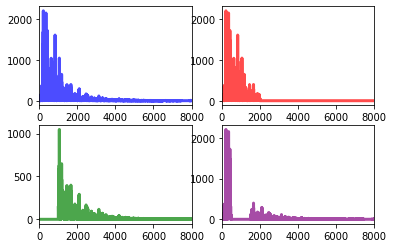

In [5]:
"""
Exercise 1.2
"""
plt.subplot(2,2,1)
plt.xlim(0,8000)
wave = thinkdsp.read_wave('setuniman__times-of-unrest.wav')
segment = wave.segment(start=16.5,duration=3)
spectrum = segment.make_spectrum()
spectrum.plot(color = 'blue')
audio=segment.make_audio()
display(audio)

plt.subplot(2,2,2)
plt.xlim(0,8000)
spectrum.low_pass(2000)
spectrum.plot(color='red')
filtered=spectrum.make_wave()
audio_filteredlp = filtered.make_audio()
display(audio_filteredlp)

plt.subplot(2,2,3)
plt.xlim(0,8000)
spectrum = segment.make_spectrum()
spectrum.high_pass(1000)
spectrum.plot(color='green')
filtered=spectrum.make_wave()
audio_filteredhp = filtered.make_audio()
display(audio_filteredhp)

plt.subplot(2,2,4)
plt.xlim(0,8000)
spectrum = segment.make_spectrum()
spectrum.band_stop(500,1500)
spectrum.plot(color='purple')
filtered=spectrum.make_wave()
audio_filteredbs = filtered.make_audio()
display(audio_filteredbs)



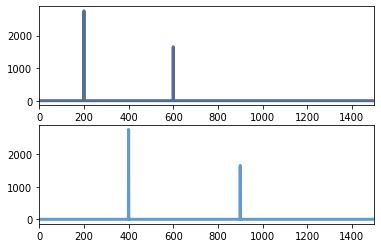

In [7]:
"""
Exercise 1.3
"""
plt.subplot(2,1,1)
plt.xlim(0,1500)
#multiples of fundamental
cos_a = thinkdsp.CosSignal(freq=200, amp=0.5, offset = 0)
sin_a = thinkdsp.SinSignal(freq=600, amp=0.3, offset = 0)
mix_a = cos_a + sin_a
wave_a = mix_a.make_wave(duration = 1, start = 0, framerate = 11025)
spectrum_a = wave_a.make_spectrum()
spectrum_a.plot()
audio_a= wave_a.make_audio()
display(audio_a)

plt.subplot(2,1,2)
plt.xlim(0,1500)
#not a multiple
cos_b = thinkdsp.CosSignal(freq=400, amp=0.5, offset = 0)
sin_b = thinkdsp.SinSignal(freq=900, amp=0.3, offset = 0)
mix_b = cos_b + sin_b
wave_b = mix_b.make_wave(duration = 1, start = 0, framerate = 11025)
spectrum_b = wave_b.make_spectrum()
spectrum_b.plot()
audio_b= wave_b.make_audio()
display(audio_b)


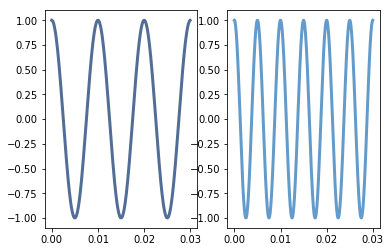

In [13]:
"""
Exercise 1.4
"""
def stretch(Wave, stretch_factor):
    Wave.ts = Wave.ts*stretch_factor
    Wave.framerate = Wave.framerate*stretch_factor
    return Wave
#says should only take 2 lines of code
#added return to get wave object back for plotting
#plot on same x-axis scale (signal period) to show stretch.
plt.subplot(1,2,1)
cos_c = thinkdsp.CosSignal(freq = 100, amp = 1, offset = 0)
wave_c= cos_c.make_wave(duration = 1, start = 0 , framerate =11025)
seg_c = wave_c.segment(start=0, duration = cos_c.period*3)
seg_c.plot()

plt.subplot(1,2,2)
#scale factor <1 increases wave speed, >1 decreases wave speed
stretchy_wave = stretch(wave_c, 0.5)
seg_stretchy = stretchy_wave.segment(start = 0, duration = cos_c.period*3)
seg_stretchy.plot()